<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Non-Negative Matrix Factorization***

$ \ $

$\color{lightblue}{\text{Non-Negative Matrix Factorization (NMF)}}$ is a dimensionality reduction technique that factorizes a non-negative data matrix into two non-negative matrices. It is widely used for feature extraction and unsupervised learning tasks. More specifically, given a non-negative data matrix $X \in \mathbb{R}^{m \times n}$ with non-negative entries, $\color{lightblue}{\text{NMF}}$ aims to find two non-negative matrices, $W \in \mathbb{R}^{m \times r}$ and $H \in \mathbb{R}^{r \times n}$, such that:

$$ X \approx WH $$

where:
- $r$ is the reduced rank or the number of components used to represent the data.
- $W$ is the non-negative basis matrix that represents the features or components of the data.
- $H$ is the non-negative coefficient matrix that encodes how much each component contributes to each data point.

The objective of $\color{lightblue}{\text{NMF}}$ is to minimize the reconstruction error between $X$ and its approximation $WH$, subject to the constraint that all entries of $W$ and $H$ are non-negative.

$(1)$ **Objective Function:**

The objective function of $\color{lightblue}{\text{NMF}}$ is typically formulated as the Frobenius norm of the reconstruction error:

$$ \underset{W, \ H}{Min} \ \frac{1}{2} \| X - WH \|_{F}^{2} $$

where $\| \cdot \|_{F}$ denotes the Frobenius norm, which is the square root of the sum of squared elements of a matrix.

$(2)$ **Non-Negativity Constraints:**

The non-negativity constraints in $\color{lightblue}{\text{NMF}}$ require that all elements of $W$ and $H$ are non-negative:

$$ W \geq 0, \quad H \geq 0 $$

This constraint ensures that the components and coefficients are additive and interpretable.

$(3)$ **Optimization:**

To find the optimal values of $W$ and $H$, various optimization algorithms can be used. One common approach is multiplicative update rules, which iteratively updates $W$ and $H$ to minimize the objective function while enforcing the non-negativity constraints. The multiplicative update rules are as follows:

$$W_{ik} \leftarrow W_{ik} \frac{(XH^T)_{ik}}{(WHH^T)_{ik}}$$

$$H_{kj} \leftarrow H_{kj} \frac{(W^TX)_{kj}}{(W^TWH)_{kj}}$$

where $(\cdot)_{ik}$ denotes the element at the $i$-th row and $k$-th column of the matrix, and $(\cdot)^T$ denotes the transpose.

$(4)$ **Initialization:**

$\color{lightblue}{\text{NMF}}$ is sensitive to initialization, and different initial values for $W$ and $H$ may result in different solutions. Common initialization strategies include random initialization and using other techniques such as $\color{lightgreen}{\text{singular value decomposition (SVD)}}$.

$(5)$ **Termination:**

The optimization process continues iteratively until convergence criteria are met. Convergence can be determined based on the number of iterations, the relative change in the objective function, or other stopping criteria.

$(6)$ **Interpretation:**

Once the optimization converges, the matrices $W$ and $H$ represent the low-dimensional feature representations and coefficients, respectively. These components and coefficients can be interpreted to understand the underlying structure and patterns in the data.

In summary, $\color{lightblue}{\text{Non-Negative Matrix Factorization}}$ is a dimensionality reduction technique that factors a non-negative data matrix into two non-negative matrices, representing features and coefficients. By enforcing non-negativity constraints, $\color{lightblue}{\text{NMF}}$ generates interpretable and additive components, making it useful for feature extraction and pattern discovery in various applications.

$ \ $

-----

## ***Idea of this notebook***

$ \ $

Imagine that you've been hired by a video streaming platform that specializes in kids content. The company would like to ensure that all content on the platform does not infringe on a copyright written material. The company has created an image database of copyrighted material, not only must you detect the same images you must detect similar images. Your  job is to come up with an image retrieval system to find the most similar image to each image in the provided dataset. Because your model is used for legal purposes it must be interpretable, this means it should be able to determine why the images are similar. As a result, you will use $\color{lightblue}{\text{Non-Negative Matrix factorization}}$ since the factorized matrices can be interpreted as real images. You will use the [Anime Face Dataset](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) from kaggle.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fake_cartoon.png" alt="cognitiveclass.ai logo">




$ \ $

-----

## ***Objectives***

$ \ $

After completing this lab you will be able to:

- Understand Basics Matrix operations  such as Matrix addition, Vector Multiplication, and Eigen decomposition.

- Apply these Matrix operations using numpy.


$ \ $

----

## ***Datasets***

$ \ $

Download and unzip the **images** dataset:

In [1]:
# Descargar el archivo de imágenes desde la URL especificada utilizando el comando 'wget'.
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/images.tar.gz"

# Descomprimir el archivo de imágenes utilizando el comando 'tar'.
!tar -xzf images.tar.gz

--2023-07-27 22:59:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/images.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60016218 (57M) [application/x-tar]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>]  57.24M  33.7MB/s    in 1.7s    

2023-07-27 22:59:56 (33.7 MB/s) - ‘images.tar.gz’ saved [60016218/60016218]



$ \ $

-----

## ***Installing required libraries***

$ \ $


The following required modules are pre-installed in the Skills Network Labs environment.

In [2]:
import logging
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import RandomState
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from os import listdir,getcwd
from os.path import isfile, join
from PIL import Image, ImageOps
import os
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_olivetti_faces

In [3]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [4]:
# Ajustamos el contexto de los gráficos a 'notebook'.
sns.set_context('notebook')

# Ajustamos el estilo de los gráficos a 'white'.
sns.set_style('white')

$ \ $

-----

## ***Defining Helper functions***

$ \ $

$(1)$ The ***get_data_matrix*** function is designed to load images from a given directory, resize them, convert them to grayscale, and transform them into a feature matrix for use in data analysis.

In [5]:
# La función get_data_matrix está diseñada para cargar imágenes desde un directorio dado, redimensionarlas, convertirlas a escala de grises y transformarlas en una matriz de características para su uso en el análisis de datos.
def get_data_matrix(test = False, Length = 100, Width = 100, mypath = "images/"):

    # Obtenemos la lista de archivos en el directorio 'mypath' que no comiencen con '.'
    files = []
    for f in listdir(mypath):
        new_path = join(mypath, f)
        if isfile(new_path) and f[0] != '.':
            files.append(new_path)

    # Si el archivo '.DS_Store' se encuentra en la lista de archivos, lo eliminamos.
    if mypath + '/.DS_Store' in files:
        files.remove(mypath + '/.DS_Store')

    # Si la opción 'test' es True, seleccionamos las imágenes de prueba (índices 9000 a 9999).
    if test:
        print("Data seleccionada = ", "test data")
        files = files[9000 : 10000]
    # De lo contrario, seleccionamos las imágenes de entrenamiento (índices 0 a 8999).
    else:
        print("Data seleccionada = ","training data")
        files = files[0:9000]

    # Imprimimos la cantidad de archivos seleccionados.
    print("Cantidad de archivos seleccionados = ", len(files))

    # Creamos una matriz 'X' de ceros con dimensiones (cantidad de archivos, Length*Width).
    X = np.zeros((len(files), Length * Width))

    # Iteramos sobre cada archivo y cargamos las imágenes, las redimensionamos a (Width, Length) y las convertimos a escala de grises.
    for i, file in enumerate(files):
        img = Image.open(file).resize((Width, Length))
        img = ImageOps.grayscale(img)

        I = np.array(img)

        # Aplanamos cada imagen y la almacenamos en la matriz 'X'.
        X[i, :] = I.reshape(1, -1)

    # Devolvemos la matriz de características 'X'.
    return X


$ \ $

$(2)$ This ***reshape_row*** function takes a one-dimensional array and displays it as a grayscale image using imshow from matplotlib.pyplot. This is useful for displaying the images found in the rows of a feature matrix when working with image data.

In [6]:
# Esta función se utiliza para mostrar una imagen en escala de grises a partir de un vector 1D que representa la imagen. La función toma como entrada el vector x y lo vuelve a darle forma en una matriz 2D, utilizando las dimensiones Length y Width especificadas.
def reshape_row(x):

    # La función 'reshape' se utiliza para cambiar la forma del vector 'x' en una matriz 2D utilizando las dimensiones 'Length' y 'Width'.
    # Luego, utilizamos la función 'plt.imshow' para mostrar la imagen en escala de grises.
    return plt.imshow(x.reshape(Length, Width), cmap = "gray")

$ \ $

$(3)$ The ***threshold*** function performs index filtering based on a specified range of similarity distances in the similar_distance array. The indices that meet the condition min_ < similar_distance < max_ are collected for the dataset (in dataset_index) and the query (in query_index). The max_ and min_ values are used to specify the limits of the range of similarity distances that you want to filter. This feature can be useful for identifying similar items within a data set based on a specific similarity threshold.

In [7]:
# Esta función se utiliza para filtrar los índices de elementos en el conjunto de datos y la consulta basados en un rango de distancias de similitud. La función toma como entrada la lista similar_distance, que contiene las distancias de similitud entre los elementos del conjunto de datos y los de la consulta. También se pueden proporcionar valores opcionales max_ y min_ para establecer los límites del rango de distancia de similitud.
def threshold(similar_distance, max_ = 0.1, min_ = 0):

    # Obtenemos los índices de elementos en el conjunto de datos que cumplen la condición:
    # min_ < similar_distance < max_
    dataset_index = np.where(np.logical_and(similar_distance > min_, similar_distance < max_))[0]

    # Obtenemos los índices de elementos en la consulta (similar_index) que cumplen la misma condición.
    # Similar_index no está definida en el código proporcionado, pero asumimos que debería ser la variable que contiene los índices de los elementos en la consulta correspondientes a las distancias de similitud en 'similar_distance'.
    query_index = similar_index[np.logical_and(similar_distance > min_, similar_distance < max_)]

    # Devolvemos los índices filtrados tanto para el conjunto de datos como para la consulta.
    return dataset_index, query_index


$ \ $

$(4)$ The ***plot_data_query*** function performs a visual comparison between samples from the original data set and samples from the query corresponding to the given indices. The comparison is performed for the first N samples selected for both the dataset and the query. Each sample pair is shown in a separate figure with two subplots, one for the dataset sample and one for the query sample. This can be useful for visualizing similarities between samples in the data set and samples in the query in a search or pattern matching analysis.

In [8]:
# Esta función se utiliza para visualizar comparaciones entre muestras del conjunto de datos y muestras de la consulta. Toma como entrada los índices de las muestras seleccionadas tanto para el conjunto de datos como para la consulta, así como el valor N, que indica cuántas muestras se mostrarán en las comparaciones.
def plot_data_query(dataset_index, query_index, N):

    # Iteramos sobre las primeras N muestras seleccionadas tanto para el conjunto de datos como para la consulta.
    for data_sample, query_sample in zip(dataset_index[0:N], query_index[0 : N]):

        # Creamos una figura con dos subplots (uno para la muestra del conjunto de datos y otro para la muestra de la consulta).
        plt.figure(figsize = (10, 4))

        #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

        # Subplot para la muestra del conjunto de datos
        plt.subplot(1, 2, 1)

        # Mostramos la muestra del conjunto de datos original usando la función reshape_row definida previamente.
        reshape_row(X[data_sample])

        # Configuramos el título del subplot
        plt.title(f"dataset sample {data_sample}")

        #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

        # Subplot para la muestra de la consulta
        plt.subplot(1, 2, 2)

        # Mostramos la muestra de la consulta correspondiente usando la función reshape_row definida previamente.
        reshape_row(X_q[query_sample])

        # Configuramos el título del subplot
        plt.title(f"query sample match {query_sample}")

        #-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

        # Mostramos la figura
        plt.show()

        # Imprimimos una línea para separar visualmente las comparaciones de las muestras
        print("\n\n\n")

$ \ $

-----

## ***Note (NMF in python).***

$ \ $

La función `sklearn.decomposition.NMF` en la biblioteca Scikit-learn (sklearn) se utiliza para realizar la factorización matricial no negativa, también conocida como Non-Negative Matrix Factorization (NMF). Esta técnica se utiliza para la reducción de la dimensionalidad y la extracción de características en conjuntos de datos no negativos. Aquí tienes una explicación de la función `sklearn.decomposition.NMF` con detalles:

```python
class sklearn.decomposition.NMF(n_components=None, init='random', solver='cd', beta_loss='frobenius', tol=1e-4, max_iter=200, random_state=None, alpha=0.0, l1_ratio=0.0, verbose=0, shuffle=False)
```

- `n_components`: Es el número de componentes que se desean extraer. Este parámetro controla la dimensión del espacio de características reducidas. Debe ser menor que el número de características originales en los datos. Si no se proporciona, se establece en `None`, lo que significa que se utilizarán todas las características disponibles.

- `init`: Es la estrategia de inicialización para los factores W y H. Puede tomar los valores `'random'` para inicialización aleatoria o `'nndsvd'` para inicialización no negativa determinista utilizando descomposición SVD (Singular Value Decomposition) con selección de vectores singulares. La inicialización `'nndsvd'` suele ser más rápida y proporcionar resultados más estables.

- `solver`: Es el método numérico utilizado para realizar la factorización. Puede ser `'cd'` para el descenso coordinado (coodinate descent), que es rápido y adecuado para matrices grandes, o `'mu'` para el descenso multiplicativo (multiplicative update). El descenso multiplicativo suele ser más lento pero puede proporcionar una mejor aproximación.

- `beta_loss`: Es la función de pérdida utilizada para cuantificar la diferencia entre la matriz de entrada y la aproximación reconstruida. Puede ser `'frobenius'` para la distancia Euclidiana cuadrática (norma de Frobenius) o `'kullback-leibler'` para la divergencia de Kullback-Leibler. `'frobenius'` es la opción más común para matrices densas, mientras que `'kullback-leibler'` es útil para matrices dispersas y valores no negativos.

- `tol`: Es la tolerancia que determina la convergencia del algoritmo. El algoritmo se detendrá si la diferencia entre las iteraciones sucesivas es menor que `tol`.

- `max_iter`: Es el número máximo de iteraciones permitidas para el algoritmo. Si el algoritmo no converge antes de alcanzar este número de iteraciones, se detendrá.

- `random_state`: Es la semilla para la generación de números aleatorios. Si se proporciona un valor, asegura que los resultados sean reproducibles.

- `alpha`: Es el valor de regularización aplicado a los factores W y H. Un valor positivo de `alpha` añade una penalización L1 (norma L1) para sparsity, lo que puede dar lugar a una representación más dispersa de los datos.

- `l1_ratio`: Es la proporción entre la penalización L1 y la penalización L2 en los factores W y H. Un valor de `l1_ratio` igual a 1 implica una penalización L1 pura, mientras que un valor de 0 implica una penalización L2 pura.

- `verbose`: Controla la cantidad de información que se muestra durante el proceso de factorización. Un valor mayor que 0 imprimirá mensajes de progreso.

- `shuffle`: Si es True, reorganiza las muestras en cada iteración del algoritmo. Esto puede ayudar a mejorar la convergencia.

Una vez que se ha ajustado el modelo NMF a los datos utilizando el método `fit`, se pueden obtener los factores W y H utilizando los atributos `components_` y `transform`, respectivamente. Los factores W y H pueden utilizarse para reconstruir la matriz de entrada original mediante la multiplicación $W \cdot H$. Además, los factores W y H son representaciones más compactas y pueden utilizarse para reducir la dimensionalidad de los datos o como características para tareas de aprendizaje automático.

En resumen, `sklearn.decomposition.NMF` es una función en Scikit-learn que permite realizar la factorización matricial no negativa (NMF) para reducir la dimensionalidad de los datos y extraer características no negativas. Se pueden controlar diferentes parámetros para ajustar el comportamiento del algoritmo y obtener una representación más compacta de los datos originales.


$ \ $

------

## ***Applying Non-Negative Matrix Factorization***

$ \ $

Image retrieval is used for searching and retrieving images from a large database of digital images. Here we would like to find identical or similar animated faces for copyright reasons.

$ \ $

$(1)$ Consider the matrix $X$ where each row is a flattened $100\times 100$ image.


In [9]:
# Definimos las dimensiones deseadas para redimensionar las imágenes.
Length, Width = 100, 100

# Utilizamos la función get_data_matrix para cargar y procesar las imágenes.
# Establecemos test=False para seleccionar las imágenes de entrenamiento.
# Especificamos las dimensiones Length y Width como 100.
# La variable mypath indica el directorio desde donde se cargarán las imágenes, en este caso, "images".
X = get_data_matrix(test = False, Length = 100, Width = 100, mypath = "images")

# La función get_data_matrix devuelve una matriz X que representa las características de las imágenes.
# Cada fila de la matriz X representa una imagen redimensionada y convertida a escala de grises.
# Las columnas representan los píxeles de cada imagen.
# X.shape muestra la forma de la matriz X, es decir, el número de filas y columnas.
# En este caso, X tiene 9000 filas (correspondientes a las primeras 9000 imágenes de entrenamiento) y 10000 columnas (representando los 100x100 píxeles de cada imagen redimensionada).
print("Tamaño de X = ", X.shape)

Data seleccionada =  training data
Cantidad de archivos seleccionados =  9000
Tamaño de X =  (9000, 10000)


$ \ $

$(2)$ Let's select a number of components for the matrix representation.


In [10]:
n_components = 10

$ \ $

$(3)$ We initialize our NMF object and fit it to $X$.


In [11]:
# Creamos un objeto nmf_estimator utilizando la clase NMF (Factorización de Matrices No Negativas) de Scikit-Learn.
# Especificamos el número de componentes n_components, la tolerancia tol y el número máximo de iteraciones max_iter.
nmf_estimator = NMF(n_components = n_components, tol = 5e-3, max_iter = 2000)

# Ajustamos el modelo NMF a la matriz de datos X utilizando el método fit.
# El objetivo es aprender una descomposición no negativa de la matriz X en dos matrices ----------------->  una matriz de base y una matriz de coeficientes.
# La matriz de base representa los componentes latentes y la matriz de coeficientes representa las combinaciones de estos componentes para reconstruir las muestras originales en X.
# donde X es el conjunto de datos original no negativo
nmf_estimator.fit(X)


NMF(max_iter=2000, n_components=10, tol=0.005)

$ \ $

$(4)$ The ***components_*** method returns the basis found.


In [12]:
# Accedemos a la matriz de base (componentes latentes) utilizando el atributo components_ del objeto nmf_estimator.
H = nmf_estimator.components_
H

array([[ 23.00697198,  22.34002288,  21.05987187, ...,  26.70852279,
         38.76657005,  26.60589778],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [668.73903858, 658.00495141, 653.06801938, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [203.77519126, 201.03579911, 188.47218015, ..., 260.44746102,
          0.        , 241.83528513],
       [161.79309139, 157.5545979 , 157.78783458, ..., 140.86218771,
        170.92314821, 146.29042802],
       [185.51921063, 184.20391998, 182.48625168, ..., 157.84393385,
        154.77715708, 161.40476707]])

$ \ $

$(5)$ We can reshape the obtained $10$ basis into images, and they appear like faces in the dataset.

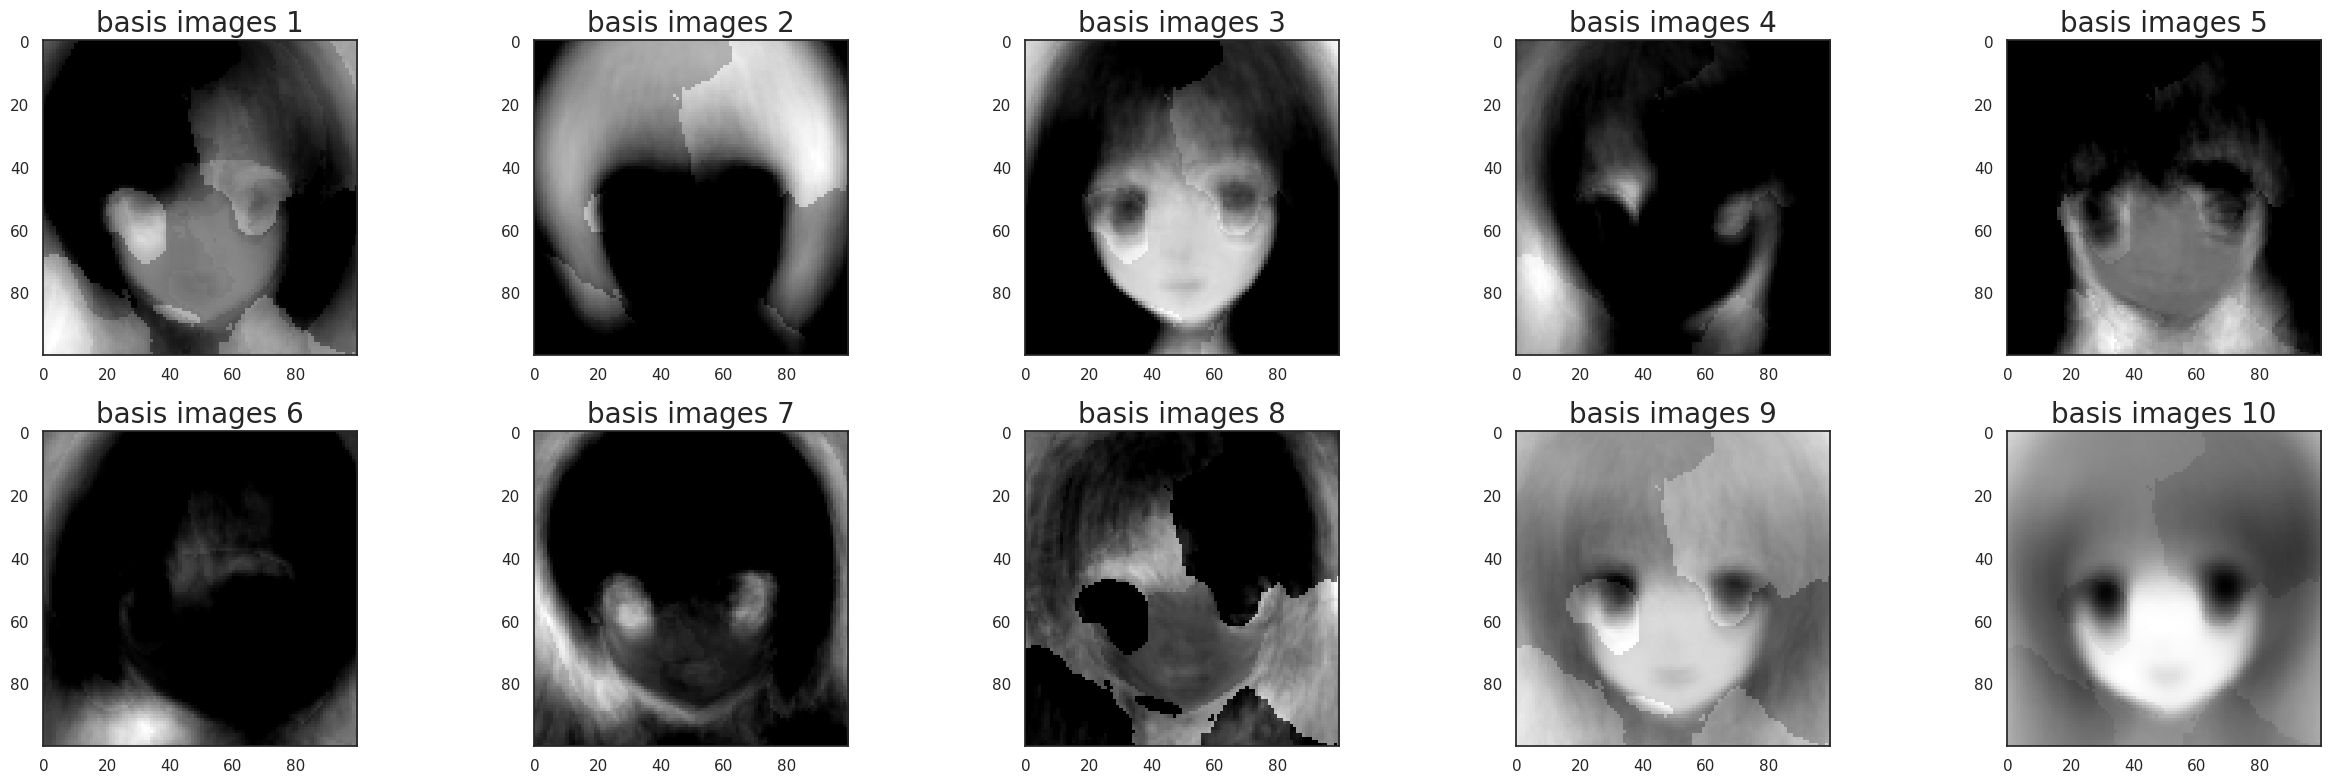

In [13]:
# Creamos una figura de tamaño (25, 8) para mostrar los componentes latentes.
plt.figure(figsize = (25, 8))

# Iteramos sobre cada componente latente 'h' y su índice 'i'.
for i, h in enumerate(H):

    # Creamos un subplot en una cuadrícula de 2 filas y 5 columnas.
    plt.subplot(2, 5, i+1)

    # Mostramos la imagen correspondiente al componente latente 'h' utilizando la función reshape_row definida previamente.
    reshape_row(h)

    # Agregamos un título al subplot indicando el número del componente latente.
    plt.title(f"basis images {str(i+1)}", fontsize = 20)

# Ajustamos el diseño de los subplots para que se muestren correctamente.
plt.tight_layout()

# Mostramos la figura con las imágenes de los componentes latentes.
plt.show()


$ \ $  

$(6)$ We obtain the encodings of all the images using the **transform** method of the fitted ***nmf_estimator***.


In [14]:
# Utilizamos el método transform del objeto nmf_estimator para obtener la matriz de coeficientes W.
# La matriz W representa las combinaciones de los componentes latentes para reconstruir las muestras originales en X.
W = nmf_estimator.transform(X)

$ \ $

$(7)$ For each of the $9000$ images we have an encoding of dimension $10$.

In [15]:
# Mostramos el tamaño de la matriz W para conocer sus dimensiones.
W.shape

(9000, 10)

$ \ $

$(8)$ The encoding tells you the projection of each image in $X$ on a particular basis. Here we plot out the encoding magnitude for the $i$ - th image on each basis.


In [16]:
# Seleccionamos el índice de la muestra específica que queremos visualizar.
i = 0

# Obtenemos los coeficientes correspondientes a la muestra seleccionada.
w = W[i, :]

# creamos la lista de numeros [1,2,3,....,len(w)]
lista = [n + 1 for n in range(len(w))]

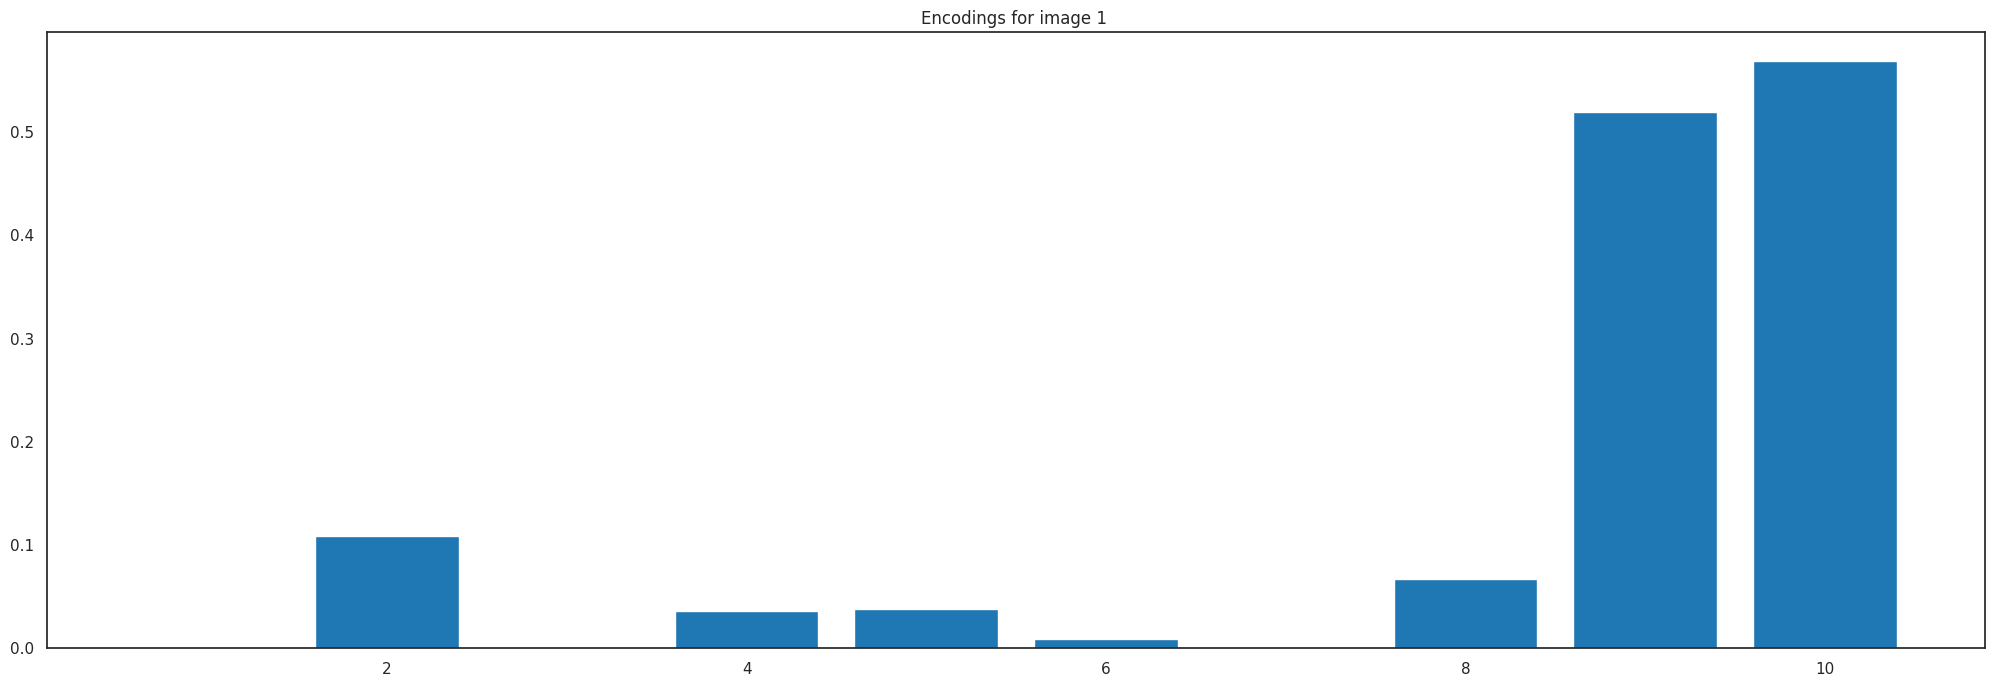

In [17]:
# Creamos una figura de tamaño (25, 8) para mostrar los componentes latentes.
plt.figure(figsize = (25, 8))

# Creamos un gráfico de barras para visualizar los coeficientes de la muestra.
x = lista
y = w
plt.bar(x, y)

# Asignamos un título al gráfico.
plt.title(f"Encodings for image {i+1} ")

# Mostramos el gráfico.
plt.show()

$ \ $

$(9)$ We see that the $10$-th encoding has the highest magnitude and , thus we can plot out the basis associated with this encoding and see that it's very similar to the image.

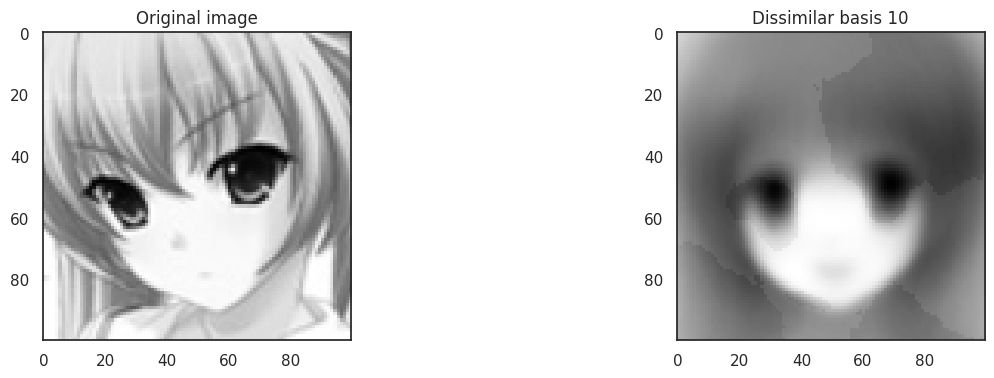

In [18]:
# Creamos una figura con tres subplots en una fila y con tamaño 15x4
plt.figure(figsize = (15, 4))


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Primer subplot: Imagen original
plt.subplot(121)

# Mostramos la imagen original utilizando la función reshape_row definida previamente.
reshape_row(X[i, :])

# Asignamos un título al subplot.
plt.title("Original image")


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Tercer subplot: Componente latente disimilar 10
plt.subplot(122)

# Mostramos el componente latente disimilar número 10 utilizando la función reshape_row definida previamente.
reshape_row(H[9, :])

# Asignamos un título al subplot.
plt.title("Dissimilar basis 10")


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Mostramos la figura con los subplots.
plt.show()


$ \ $

$(10)$ We perform the inverse transform using the method ***inverse_transform*** to get $\hat{X}$, the approximation of $X$.


In [19]:
# Utilizamos el modelo NMF entrenado (nmf_estimator) para reconstruir las imágenes originales a partir de los coeficientes latentes (W).
# Las imágenes reconstruidas se almacenan en la variable X_hat.
X_hat = nmf_estimator.inverse_transform(W)

# Mostramos las imágenes reconstruidas.
X_hat

array([[222.52143153, 219.6091476 , 218.78503892, ..., 190.19424203,
        191.22903597, 194.25670238],
       [222.70660473, 220.20510717, 219.28906284, ..., 208.29927144,
        200.02536317, 212.08977899],
       [258.54034292, 254.3021177 , 251.19282533, ..., 119.55067622,
         91.26247559, 119.46347129],
       ...,
       [184.56957856, 181.01238267, 179.33255522, ..., 166.51095494,
        182.2565886 , 169.58661547],
       [247.43048805, 242.72877045, 241.29072972, ..., 213.64374504,
        201.73731008, 216.76359814],
       [257.02424203, 252.39301213, 250.69772659, ..., 121.00465122,
        110.71536568, 122.41207782]])

Each row of $\hat{X}$ corresponds to an image.

$ \ $

$(11)$ We reshape the row into an image and plot the approximations.


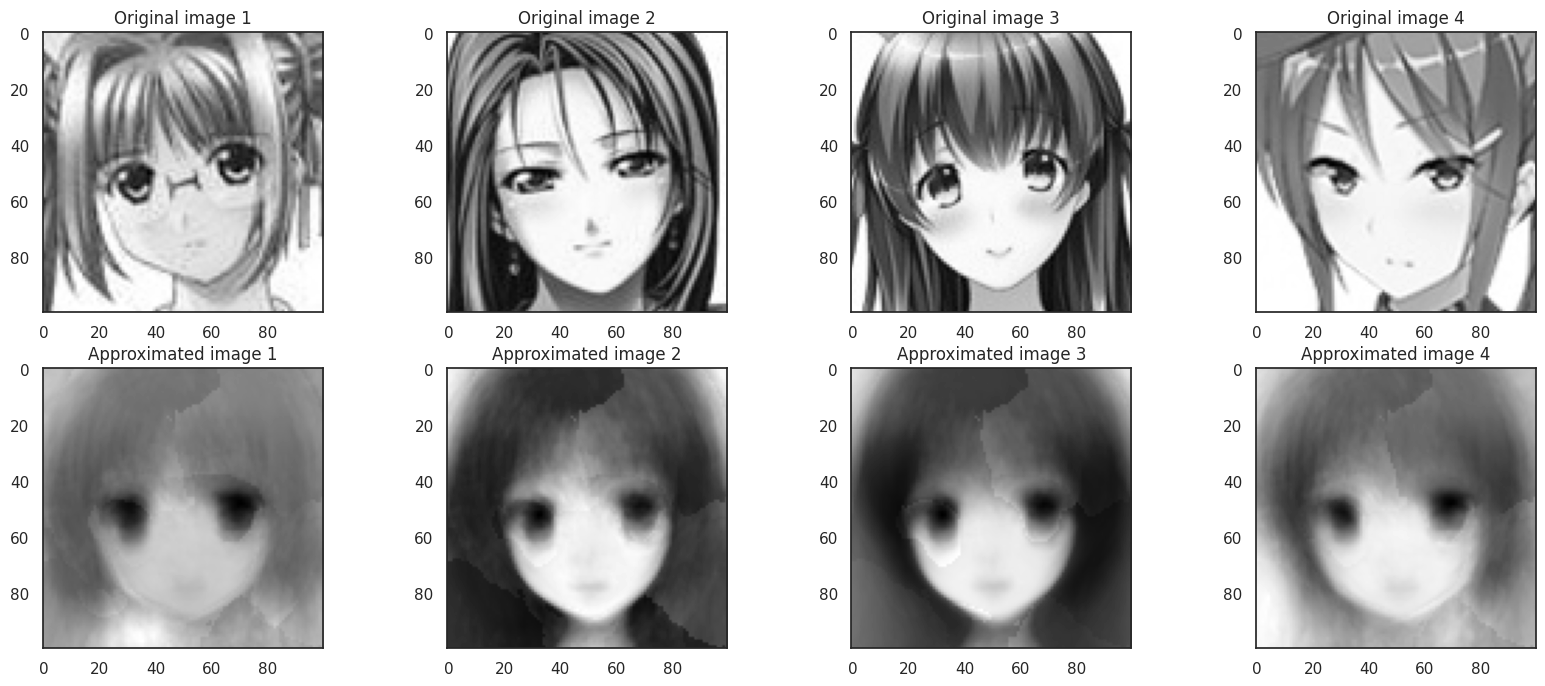

In [20]:
# Creamos una figura con 8 subplots organizados en 2 filas y 4 columnas.
plt.figure(figsize = (20, 8))


# Para cada valor 'i' en el rango de 1 a 4 (incluyendo 4), creamos dos subplots en cada iteración.
for i in range(1, 5):

    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    # Primer subplot en la fila superior: muestra la imagen original 'X[i]'.
    plt.subplot(2, 4, i)

    # Utilizamos la función reshape_row para mostrar la imagen original 'X[i]' en escala de grises.
    reshape_row(X[i])

    # Asignamos un título al subplot indicando que se trata de la imagen original con su respectivo número.
    plt.title(f"Original image {i}")

    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    # Segundo subplot en la fila inferior: muestra la imagen aproximada 'X_hat[i]' obtenida después de aplicar el modelo NMF.
    plt.subplot(2, 4, i + 4)

    # Utilizamos la función reshape_row para mostrar la imagen aproximada 'X_hat[i]' en escala de grises.
    reshape_row(X_hat[i])

    # Asignamos un título al subplot indicando que se trata de la imagen aproximada con su respectivo número.
    plt.title(f"Approximated image {i}")


$ \ $

$(12)$ We verify that the scikit-learn's inverse_transform method essentially performs the following matrix operation.

In [21]:
# En esta línea de código, estamos calculando la aproximación reconstruida de los datos originales 'X' utilizando el modelo de Factorización Matricial No Negativa (NMF).
X_hat_M = W @ H

# Mostramos las imágenes reconstruidas.
X_hat_M

array([[222.52143153, 219.6091476 , 218.78503892, ..., 190.19424203,
        191.22903597, 194.25670238],
       [222.70660473, 220.20510717, 219.28906284, ..., 208.29927144,
        200.02536317, 212.08977899],
       [258.54034292, 254.3021177 , 251.19282533, ..., 119.55067622,
         91.26247559, 119.46347129],
       ...,
       [184.56957856, 181.01238267, 179.33255522, ..., 166.51095494,
        182.2565886 , 169.58661547],
       [247.43048805, 242.72877045, 241.29072972, ..., 213.64374504,
        201.73731008, 216.76359814],
       [257.02424203, 252.39301213, 250.69772659, ..., 121.00465122,
        110.71536568, 122.41207782]])

$ \ $

$(13)$ We see the results are identical quantitatively (for the first $10$ grayscale values of first image).


In [22]:
X_hat[0,:10], X_hat_M[0,:10]

(array([222.52143153, 219.6091476 , 218.78503892, 219.73485069,
        218.27560497, 216.88409417, 216.37059375, 213.97814257,
        211.75172658, 212.00196632]),
 array([222.52143153, 219.6091476 , 218.78503892, 219.73485069,
        218.27560497, 216.88409417, 216.37059375, 213.97814257,
        211.75172658, 212.00196632]))

$ \ $

$(14)$ We show visually for the second to fifth image in the dataset.


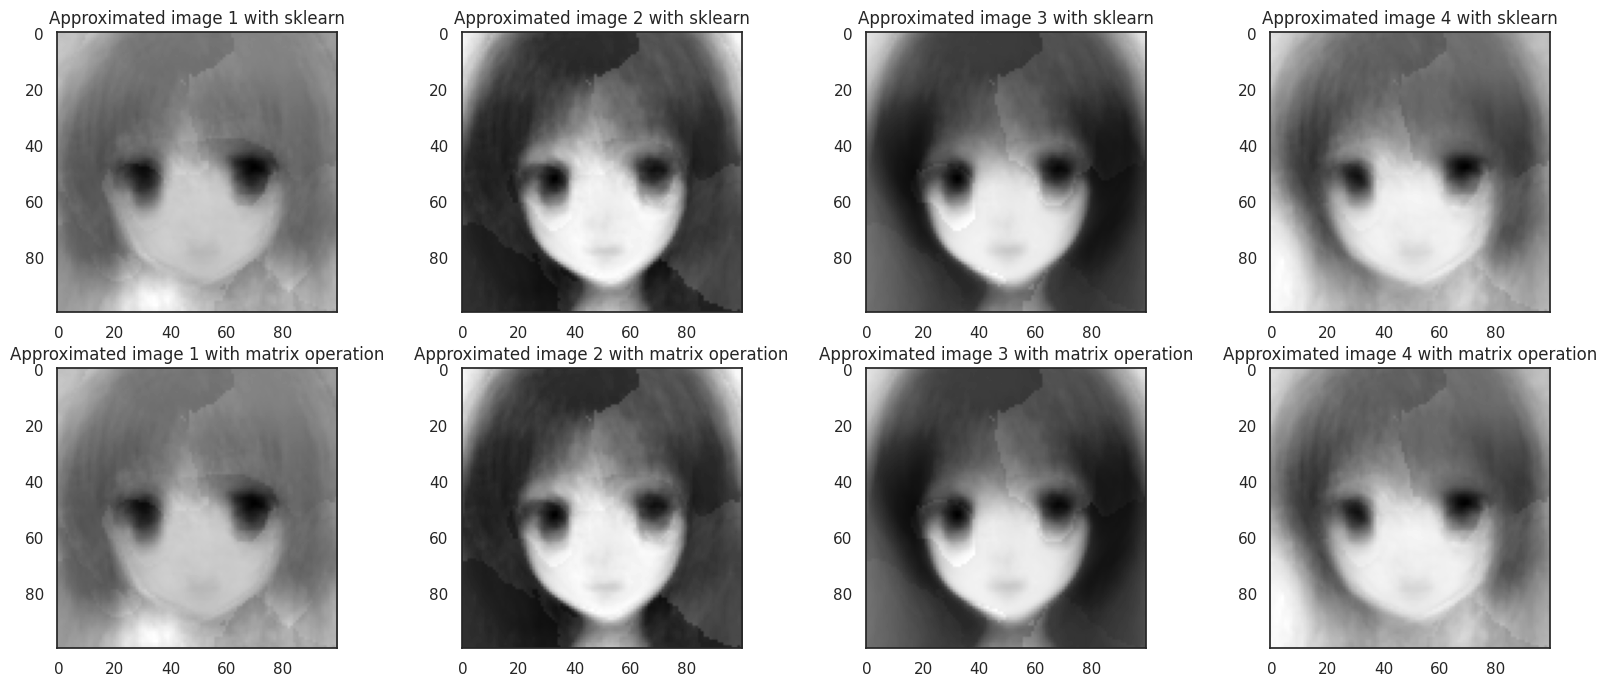

In [23]:
# En el siguiente código, estamos creando una figura con 8 subplots organizados en 2 filas y 4 columnas. En cada iteración del bucle for, mostramos dos imágenes en cada fila.

# Creamos una imagen de tamaño 20x8
plt.figure(figsize = (20, 8))

# realizamos una iteracion sobre los numeros [1,2,3,4]
for i in range(1, 5):

    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    # Primer subplot en la fila superior: muestra la imagen aproximada 'Xhat[i]' obtenida utilizando la biblioteca sklearn.
    plt.subplot(2, 4, i)

    # Utilizamos la función reshape_row para mostrar la imagen aproximada 'Xhat[i]' en escala de grises.
    reshape_row(X_hat[i])

    # Asignamos un título al subplot indicando que se trata de la imagen aproximada con el número correspondiente.
    plt.title(f"Approximated image {i} with sklearn")

    # ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    # Segundo subplot en la fila inferior: muestra la imagen aproximada 'Xhat_M[i]' obtenida utilizando la multiplicación de matrices.
    plt.subplot(2, 4, i + 4)

    # Utilizamos la función reshape_row para mostrar la imagen aproximada 'Xhat_M[i]' en escala de grises.
    reshape_row(X_hat_M[i])

    # Asignamos un título al subplot indicando que se trata de la imagen aproximada con el número correspondiente.
    plt.title(f"Approximated image {i} with matrix operation")


$ \ $

$(15)$ We reconstruct the image by adding one component multiplied by it's encoding at a time. This is shown in the following lines of code, as each successive component is added we see the image looks more and more like it's approximation.

In [24]:
# Inicializamos una matriz de imágenes llamada 'image' con 10000 ceros, que luego será redimensionada a 100x100.
image = np.zeros((1, 10000))

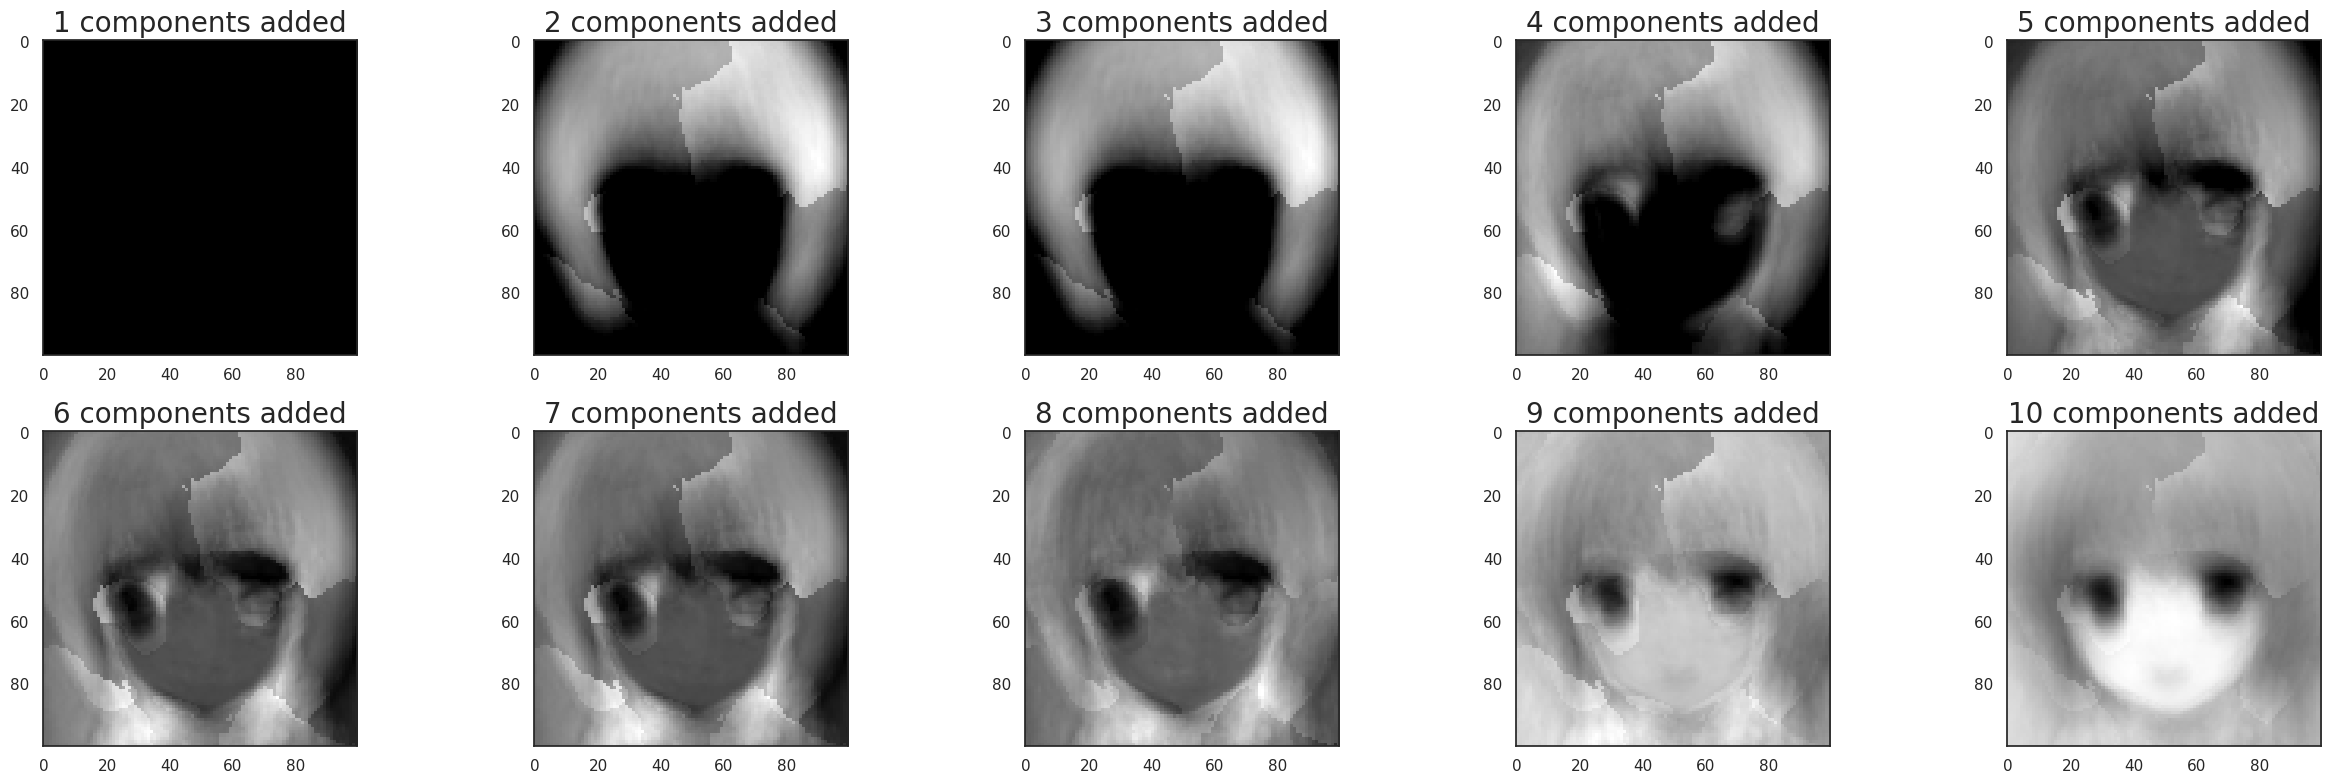

In [25]:
# Creamos una figura con 10 subplots organizados en 2 filas y 5 columnas.
plt.figure(figsize = (25, 8))

# Iteramos sobre los elementos de las matrices 'w' y 'H'.
for i, (l, h) in enumerate(zip(w, H)):

    # 'l' representa un elemento del vector de codificación 'w' de la primera imagen en X.
    plt.subplot(2, 5, i + 1)

    # Actualizamos la matriz de imágenes 'image' sumando el producto de 'l' y 'h'.
    # La reconstrucción de la imagen es una combinación lineal de las componentes de 'H'.
    image += l * h

    # Utilizamos la función reshape_row para mostrar la imagen actualizada en escala de grises.
    reshape_row(image)

    # Asignamos un título al subplot indicando la cantidad de componentes añadidas a la imagen.
    plt.title(f"{i + 1} components added", fontsize = 20)

# Ajustamos el diseño de los subplots para que queden bien distribuidos en la figura.
plt.tight_layout()

$ \ $

-----

## ***Image Retrieval System***

$ \ $

An $\color{lightblue}{\text{image retrieval system}}$ is a powerful tool used to search and retrieve images from a vast database based on their content and visual features. In the context of copyright infringement for cartoon characters, such a system can help identify potentially similar or identical characters, assisting in detecting unauthorized usage of copyrighted material. To implement this system, we will use a popular technique called Content-Based Image Retrieval (CBIR).

$\color{lightgreen}{\text{Content-Based Image Retrieval (CBIR):}}$
CBIR is a technique that allows us to search for images in a database based on their visual content rather than relying on metadata or textual information. The fundamental idea behind CBIR is to extract and represent the visual features of an image in a way that allows efficient searching and comparison with other images in the database.

$\color{lightgreen}{\text{Feature Extraction:}}$
One critical step in CBIR is feature extraction. We need to extract representative features from the images that can capture the essential characteristics of the cartoon characters. Commonly used features for image retrieval include:

> $(1)$ $\color{lightblue}{\text{Color Histograms:}}$ Represent the distribution of colors in the image. Each channel (e.g., red, green, blue) is divided into bins, and the frequency of each color in the image is recorded.

> $(2)$ $\color{lightblue}{\text{Texture Descriptors:}}$ Capture the texture patterns in the image. Techniques like Local Binary Patterns (LBP) or Haralick features can be used to describe the texture.

> $(3)$ $\color{lightblue}{\text{Shape Descriptors:}}$ Describe the shape of the objects in the image. Techniques like Scale-Invariant Feature Transform (SIFT) or Histogram of Oriented Gradients (HOG) can be used to represent the shape features.

> $(4)$ $\color{lightblue}{\text{Deep Learning Features:}}$ Pre-trained deep learning models, such as Convolutional Neural Networks (CNNs), can be used to extract high-level features that are highly discriminative for image retrieval.

$\color{lightgreen}{\text{Similarity Measure:}}$
Once we have extracted the features for the query image, we need to compare them with the features of images in the database to find similar cartoon characters. The similarity measure computes the distance between the feature representations of the query image and the images in the database. One common similarity measure is the **Euclidean distance** between feature vectors. Given two feature vectors $X$ and $Y$, the Euclidean distance $d_{\text{euclidean}}$ is computed as:

$$ d_{\text{euclidean}}(X, Y) = \sqrt{\sum_{i=1}^{N} (X_i - Y_i)^2} $$

where $X_i$ and $Y_i$ are the feature values at position $i$ in the feature vectors.

$\color{lightgreen}{\text{Image Retrieval Process:}}$
The image retrieval process involves the following steps:

> $(1)$ $\color{lightblue}{\text{Database Building:}}$ Create a database of cartoon character images. For each image, extract the relevant features and store them along with the image metadata.

> $(2)$ $\color{lightblue}{\text{Query Image:}}$ Select a query image, which is the cartoon character image for which we want to find similar matches.

> $(3)$ $\color{lightblue}{\text{Feature Extraction:}}$ Extract the features from the query image using the same feature extraction techniques used for the database images.

> $(4)$ $\color{lightblue}{\text{Similarity Search:}}$ Compare the feature vector of the query image with the feature vectors of the images in the database using the chosen similarity measure. Rank the database images based on their similarity to the query image.

> $(5)$ $\color{lightblue}{\text{Results Display:}}$ Display the top-ranked images from the database as the most visually similar cartoon characters to the query image.

***Conclusion:***

By implementing an image retrieval system using CBIR techniques, we can efficiently find similar cartoon characters in a large database based on their visual content. This can aid in copyright infringement detection and other applications that involve searching and retrieving images based on their visual characteristics. The choice of feature extraction methods and similarity measures will heavily influence the accuracy and efficiency of the image retrieval system.

$ \ $

-----

## ***Matriz de distancias***

$ \ $

Supongamos que tenemos dos conjuntos de datos:

* El conjunto de consulta, que contiene $n$ vectores representados por $x_1, x_2, ..., x_n$,

* El conjunto de datos original, que contiene $m$ vectores representados por $x'_1, x'_2, ..., x'_m$.

El cálculo de la matriz de distancias $D$ utilizando la similitud del coseno se realiza de la siguiente manera:

$(1)$ $\color{lightgreen}{\text{Cálculo de la Similitud del Coseno:}}$  Para cada par de vectores $x$ y $x'$, la similitud del coseno se calcula como el producto punto normalizado de los dos vectores. La similitud del coseno se define como:

$$ \text{Cosine Similarity}(x, x') = \frac{{x \bullet x'}}{{\|x\| \bullet \|x'\|}} $$

donde $x \bullet x'$ representa el producto punto (producto escalar) entre los vectores $x$ y $x'$, y $\|x\|$ y $\|x'\|$ son las normas euclidianas de los vectores $x$ y $x'$ respectivamente.

$(2)$ $\color{lightgreen}{\text{Cálculo de la Matriz de Distancias:}}$ Una vez que hemos calculado la similitud del coseno para cada par de vectores $x$ y $x'$, podemos construir la matriz de distancias $D$ que contiene las distancias entre los elementos del conjunto de consulta y el conjunto de datos original. Dado que estamos usando la similitud del coseno, la distancia entre dos vectores será el complemento de la similitud, es decir:

$$ \text{Distance}(x, x') = 1 - \text{Cosine Similarity}(x, x') $$

La matriz de distancias $D$ tendrá $n$ filas y $m$ columnas, donde $D_{ij}$ representará la distancia entre el vector $x_i$ del conjunto de consulta y el vector $x'_j$ del conjunto de datos original.

$(3)$ $\color{lightgreen}{\text{Matriz de Distancias Resultante:}}$ La matriz de distancias $D$ contendrá todas las distancias entre los elementos del conjunto de consulta y el conjunto de datos original. Cada valor $D_{ij}$ en la matriz será un número entre $0$ y $2$, donde $0$ indica que los vectores $x_i$ y $x'_j$ son idénticos, y $2$ indica que los vectores son completamente opuestos.

Una vez que tenemos la matriz de distancias $D$, podemos utilizarla para buscar las similitudes entre el conjunto de consulta y el conjunto de datos original, por ejemplo, para encontrar los elementos más cercanos a cada vector del conjunto de consulta o para realizar tareas de clasificación o agrupamiento basadas en la similitud de los vectores.

En este Notebook, usaremos la función ***pairwise_distances*** de scikit-learn. Este método toma una matriz vectorial y devuelve una matriz de distancia.

$ \ $

----

## ***Example (distance matrix)***

$ \ $

Consider the following set of codes in which case that we represent as $2$ - D vectors.  The original  dataset is in yellow and the query dataset is in blue. We see that the image $h_2$ is nearest  to  $h_{2q}$, and similarly image $h_3$ is nearest  to  $h_{1q}$.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/NNMF_vectors.png" width="500" alt="https://pxhere.com/en/photo/1536663">


The resultant distance Matrix is shown below, each row consists of a dataset sample and each column consists of a query dataset sample. Each element of the distance Matrix comprises of the distance between the sample of that particular row and that particular column. We see in this case samples that are close together have the smallest  value. For example, image $h_2$  in the second row is nearest to $h_{2q}$ in the second column.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/Sim_Matix.png" width="500" alt="https://pxhere.com/en/photo/1536663">


$ \ $

----

## ***Example***

$ \ $


$(1)$ We define the query dataset as the set of $1000$ images. If these images are similar to the images in our original dataset, they may be considered as copyright infringement. We load the query dateset into $X_q$ where each row corresponds to a flattened $100\times 100$ image.


In [26]:
# Utilizamos la función 'get_data_matrix' para cargar las imágenes de prueba desde el directorio 'images'.
# Configuramos los argumentos 'test = True', 'Length = 100', 'Width = 100' y 'mypath = "images"'.
X_q = get_data_matrix(test = True, Length = 100, Width = 100, mypath = "images")

# Mostramos la forma (shape) de la matriz 'X_q', que contiene las imágenes de prueba en formato de matriz de características.
X_q.shape

Data seleccionada =  test data
Cantidad de archivos seleccionados =  1000


(1000, 10000)

$ \ $

$(2)$ The code in the next cell helps us retain much of the important information of the query images and reduces factors that make similar images appear differently such as noise, rotation and scale. In addition, the code results in a matrix $W_q$ that requires less computation for calculating the distance metrics. As such we will use the code to find the similar images.


In [27]:
# Utilizamos el modelo NMF previamente entrenado (nmf_estimator) para transformar las imágenes de prueba 'X_q' en coeficientes latentes 'W_q'.
W_q = nmf_estimator.transform(X_q)

# Mostramos la forma (shape) de la matriz 'W_q'.
W_q.shape

(1000, 10)

$ \ $

$(3)$ We calculate the pairwise distances between the latent coefficients of the training set $W$ and the latent coefficients of the test set $W_q$. Specifically, we are calculating the distances because between all rows of $W$ and all rows of $W_q$.

In [28]:
# Calculamos las distancias pairwise entre los coeficientes latentes del conjunto de entrenamiento 'W' y los coeficientes latentes del conjunto de prueba 'W_q'.
# Utilizamos la métrica de distancia 'cosine', que calcula la similitud coseno entre dos vectores.
D = pairwise_distances(W, W_q, metric = 'cosine')

$ \ $

$(4)$ We see the number of rows corresponds to the number of samples in the original dataset and the number of columns corresponds to the number of samples in the query dateset.

In [29]:
D.shape

(9000, 1000)

$ \ $

$(5)$ For each sample in the dataset we find the query sample that has the smallest distance to it, which would be the most similar image. As each image in the original dataset corresponds to a row in the distance matrix, the column index with smallest value corresponds to the index of the closest image in the query dataset.

In [30]:
# Obtenemos los índices de los elementos mínimos a lo largo del eje 1 (columnas) de la matriz 'D'.
similar_index = np.argmin(D, axis = 1)

$ \ $

$(6)$ We also find the corresponding distance value.

In [31]:
# Obtenemos los valores mínimos a lo largo del eje 1 (columnas) de la matriz 'D'.
similar_distance = np.min(D, axis = 1)

$ \ $

$(7)$ We plot out the distance values in a histogram; we see the values range from zero to approximately $0.06$.

Text(0.5, 1.0, 'Distance values')

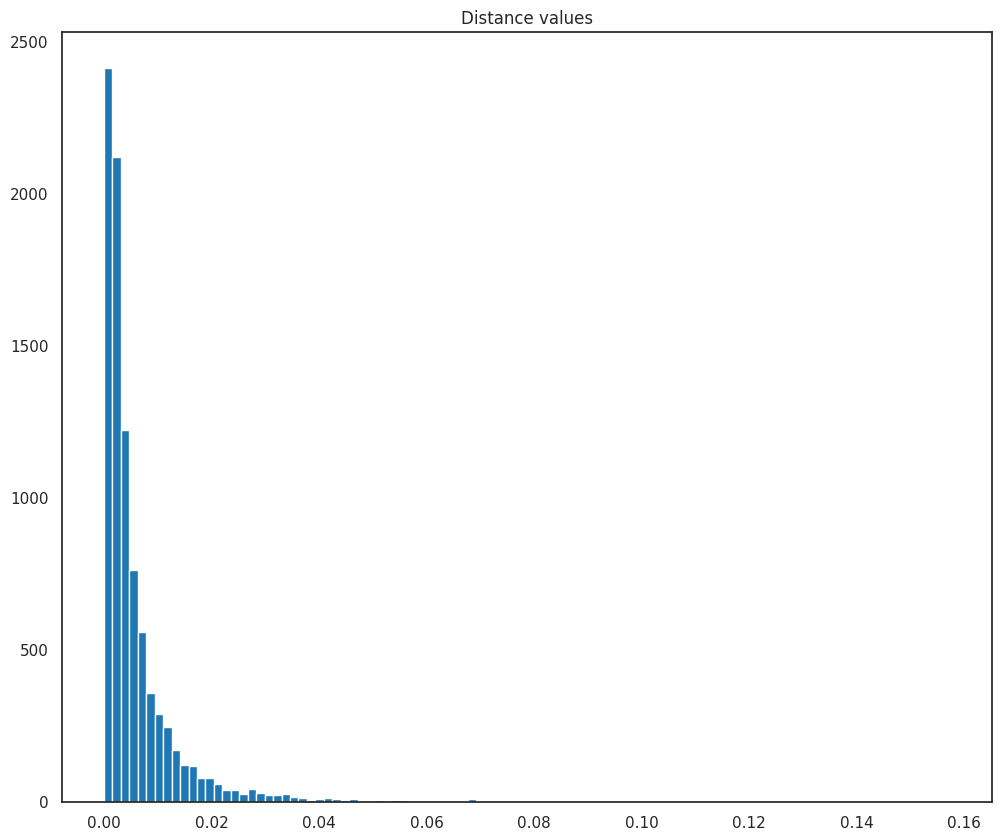

In [32]:
# Creamos una figura con 8 subplots organizados en 2 filas y 4 columnas.
plt.figure(figsize = (12, 10))

# Creamos un histograma de los valores en la matriz 'similar_distance'.
plt.hist(similar_distance, bins = 100)

# Agregamos un título al histograma.
plt.title("Distance values")

$ \ $

$(8)$ If we try a maximum threshold of $1.0 \times 10^{-5} = 0.00001$ for the distance value for the first five samples, we get identical images.


In [33]:
# Utilizamos la función 'threshold' previamente definida para obtener dos conjuntos de índices: dataset_index y query_index.
# Estos conjuntos de índices representan los índices de las imágenes en el conjunto de datos de entrenamiento (X)
# y en el conjunto de imágenes de prueba (X_q) que cumplen con ciertos criterios de similitud basados en los valores de distancia similar_distance.
dataset_index, query_index = threshold(similar_distance, max_ = 0.00001, min_ = 0)

In [34]:
dataset_index.shape, query_index.shape

((58,), (58,))

$ \ $

$(9)$ If we try a threshold of between $5.0 \times 10^{-3}= 0.005$ and $1.0 \times 10^{-2}=0.01$ instead and plot out the first five samples, it is evident the many of the query images are very different from the original.


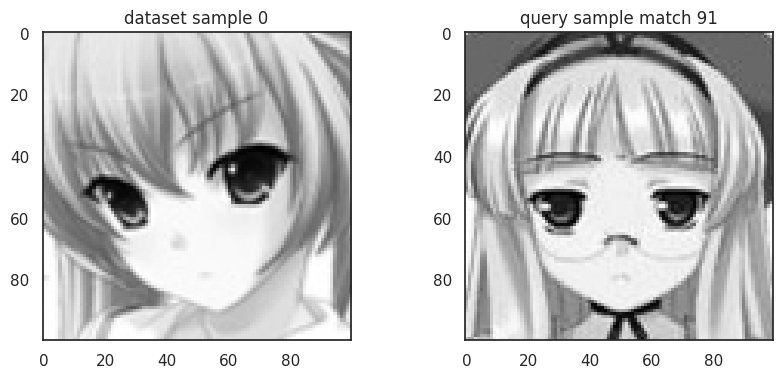

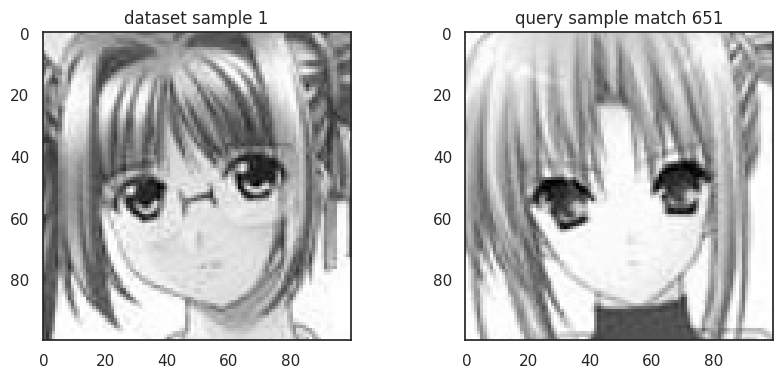

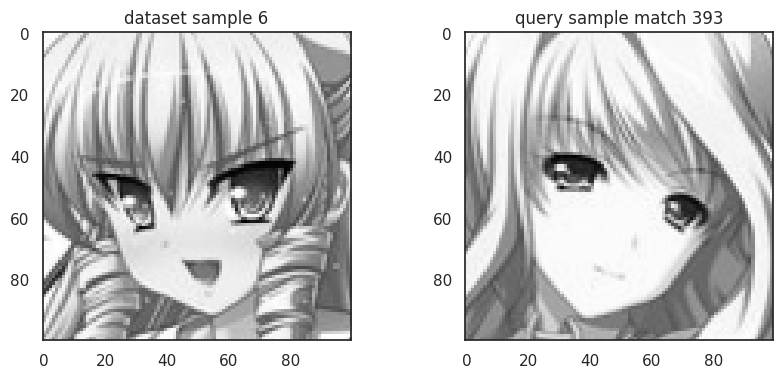

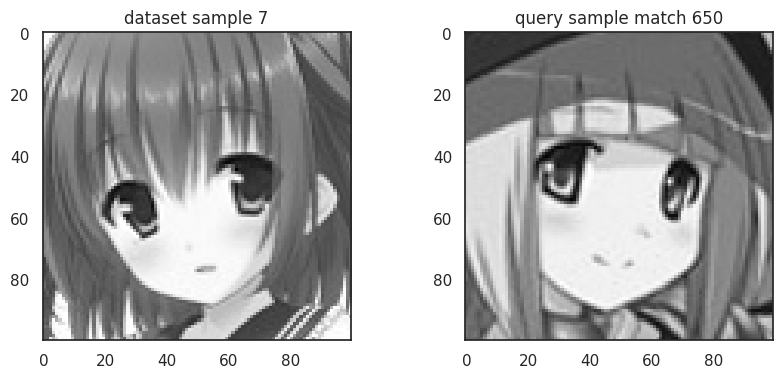

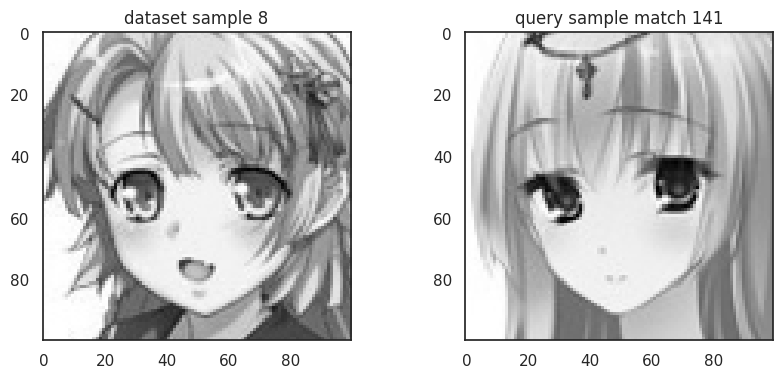

In [35]:
# Filtramos los índices de las imágenes que cumplen con ciertos criterios de similitud utilizando la función 'threshold'.
# 'similar_distance' es un arreglo que contiene las distancias más cercanas entre las imágenes del conjunto de entrenamiento y prueba.
# Establecemos 'max_' en 0.005 y 'min_' en 0.00001 como valores de corte para seleccionar las imágenes similares.
dataset_index, query_index = threshold(similar_distance, max_ = 0.005, min_ = 0.00001)

# Visualizamos las imágenes correspondientes en los conjuntos de entrenamiento y prueba utilizando la función 'plot_data_query'.
# 'dataset_index' contiene los índices de las imágenes similares en el conjunto de entrenamiento.
# 'query_index' contiene los índices de las imágenes similares en el conjunto de prueba.
# Establecemos 'N' en 5 para mostrar solo las primeras 5 imágenes de cada conjunto.
plot_data_query(dataset_index, query_index, N = 5)

$ \ $

------

## ***Example***

$ \ $

$(1)$ We will apply $NMF$ on the [face images](https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py) from scikit-learn and perform an image retrievel task to find pairs of faces that are similar.

In [36]:
# Creamos una instancia del generador de números aleatorios 'RandomState' con una semilla (0 en este caso).
# Esto asegura que la aleatoriedad se mantenga consistente en diferentes ejecuciones del código.
rng = RandomState(0)

# Utilizamos la función 'fetch_olivetti_faces' de Scikit-learn para cargar el conjunto de datos Olivetti Faces.
# El parámetro 'shuffle=True' indica que los datos se barajearán aleatoriamente antes de dividirlos en conjuntos de entrenamiento y prueba.
# También pasamos la instancia 'rng' del generador de números aleatorios para garantizar la consistencia en la barajación.
data = fetch_olivetti_faces(shuffle = True, random_state = rng)

# Extraemos las imágenes de las caras del conjunto de datos y las almacenamos en la variable 'X'.
# Cada imagen es una matriz de 64x64 píxeles, lo que significa que cada imagen tiene 64x64 = 4096 características (píxeles).
X = data.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


$ \ $

$(2)$ We define the function ***plot_faces*** that will be used to plot pictures of faces in a data set. The function takes several arguments, including a title for the chart, the images to display, the number of columns and rows in the chart layout, and the colormap to use for the display (default is grayscale).

In [37]:
# Definimos el tamaño de cada imagen de cara. En este caso, las imágenes tienen un tamaño de 64x64 píxeles.
image_shape = (64, 64)

In [38]:
# Creamos una función llamada 'plot_faces' que se utilizará para visualizar imágenes de caras en un conjunto de datos.
# La función toma varios argumentos, incluyendo un título para el gráfico, las imágenes a visualizar, el número de columnas y filas en el diseño del gráfico, y el mapa de colores a utilizar para la visualización (por defecto es escala de grises).
def plot_faces(title, images, n_col, n_row, cmap = plt.cm.gray):

    # Creamos una figura que contiene múltiples subplots organizados en un diseño de rejilla.
    # El número de filas y columnas está determinado por los argumentos 'n_row' y 'n_col'.
    # También especificamos el tamaño de la figura (en pulgadas) utilizando 'figsize'.
    # El color de fondo de la figura se establece en blanco usando 'facecolor'.
    # 'constrained_layout=True' asegura que los subplots no se superpongan.
    fig, axs = plt.subplots(nrows = n_row, ncols = n_col, figsize = (2.0 * n_col, 2.3 * n_row), facecolor = 'white', constrained_layout = True)

    # Ajustamos el espaciado entre los subplots y entre el título de la figura y los subplots.
    # 'w_pad=0.01' y 'h_pad=0.02' controlan el espacio horizontal y vertical entre los subplots, respectivamente.
    # 'hspace=0' y 'wspace=0' eliminan el espacio entre las filas y columnas de subplots.
    fig.set_constrained_layout_pads(w_pad = 0.01, h_pad = 0.02, hspace = 0, wspace = 0)

    # Establecemos el borde de la figura en negro.
    fig.set_edgecolor("black")

    # Agregamos un título general a la figura utilizando 'suptitle'.
    # 'size=16' establece el tamaño de la fuente del título.
    fig.suptitle(title, size = 16)

    # Iteramos sobre los subplots y las imágenes proporcionadas en el argumento 'images'.
    # 'ax' representa cada uno de los subplots, mientras que 'vec' representa cada imagen en formato unidimensional.
    for ax, vec in zip(axs.flat, images):

        # Calculamos el valor máximo absoluto de la imagen para ajustar los colores.
        vmax = max(vec.max(), -vec.min())

        # Mostramos la imagen en el subplot utilizando 'imshow'.
        # Utilizamos 'vec.reshape(image_shape)' para convertir la imagen unidimensional en una matriz 2D con el tamaño 'image_shape'.
        # Especificamos el mapa de colores a utilizar para la visualización con el argumento 'cmap'.
        # 'interpolation="nearest"' muestra la imagen sin suavizado.
        # 'vmin' y 'vmax' establecen el rango de colores para la imagen utilizando el valor máximo absoluto.
        im = ax.imshow(vec.reshape(image_shape), cmap = cmap, interpolation = "nearest", vmin = -vmax, vmax = vmax)

        # Desactivamos los ejes para cada subplot para una visualización más limpia.
        ax.axis('off')

    # Agregamos una barra de colores horizontal en la parte inferior de los subplots utilizando 'fig.colorbar'.
    # La barra de colores muestra los valores utilizados para representar los colores en las imágenes.
    # 'orientation="horizontal"' indica que la barra de colores se mostrará horizontalmente.
    # 'shrink=0.99' ajusta el tamaño de la barra de colores.
    # 'aspect=40' y 'pad=0.01' controlan el aspecto y el espaciado de la barra de colores, respectivamente.
    fig.colorbar(im, ax = axs, orientation = 'horizontal', shrink = 0.99, aspect = 40, pad = 0.01)

    # Mostramos la figura completa que contiene los subplots con las imágenes.
    plt.show()


$ \ $

$(3)$ We use the ***plot_faces*** function to plot the first $6$ faces in the dataset.

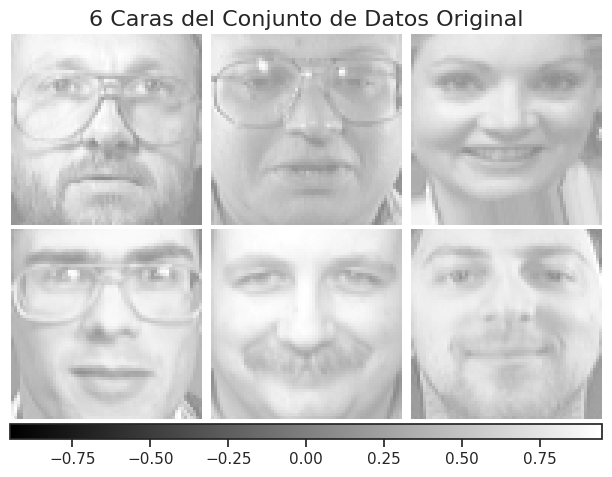

In [39]:
# Utilizamos la función 'plot_faces' que definimos previamente para mostrar las primeras 6 imágenes del conjunto de datos Olivetti Faces en una figura.
# La figura se organizará en un diseño de 3 filas y 2 columnas.
plot_faces("6 Caras del Conjunto de Datos Original", X[:6], 3, 2)

$ \ $

$(4)$ Split the dataset into two such that the first $300$ is used as the original dataset $X_r$ and the remaining $100$ is used as the query dataset $X_q$. Initialize a NMF instance with $n_{\text{components}} = 10$, and use it to transform $X_r$ and $X_q$ into encodings.

In [40]:
# Creamos una matriz 'X_r' que contiene las primeras 300 imágenes del conjunto de datos 'X' original.
# Utilizamos el método 'reshape' para reorganizar la matriz 'X' de tal manera que cada fila represente una imagen y cada columna sea una característica (píxel).
X_r = X[:300].reshape((300, 64*64))

# Creamos otra matriz 'X_q' que contiene las siguientes 100 imágenes del conjunto de datos 'X' original.
# Al igual que 'X_r', también utilizamos el método 'reshape' para reorganizar la matriz 'X' en el formato adecuado.
X_q = X[300:].reshape((100, 64*64))

In [41]:
# Creamos una instancia del modelo NMF (Factorización Matricial No Negativa) con 10 componentes.
# El parámetro 'n_components' se establece en 10, lo que significa que queremos obtener 10 componentes latentes.
# Los parámetros 'tol' y 'max_iter' controlan la tolerancia para la convergencia del algoritmo y el número máximo de iteraciones permitidas para la optimización del modelo, respectivamente.
nmf = NMF(n_components = 10, tol = 5e-3, max_iter = 2000)

In [42]:
# Aplicamos el método 'fit_transform' del modelo NMF a la matriz 'X_r'.
# Esto ajustará el modelo a los datos 'X_r' y transformará los datos originales en sus respectivas representaciones latentes en el espacio de componentes.
X_r_W = nmf.fit_transform(X_r)

# Luego, aplicamos el método 'fit_transform' del modelo NMF a la matriz 'X_q'.
# Al igual que antes, esto ajustará el modelo a los datos 'X_q' y transformará los datos originales en sus representaciones latentes en el espacio de componentes.
X_q_W = nmf.fit_transform(X_q)

$ \ $

$(5)$ Calculate the pairwise distances between face encodings from the original and query dataset, store the result in $D$.

In [43]:
# Calculamos las distancias de similitud entre las matrices de coeficientes latentes 'X_r_W' y 'X_q_W'.
# La función 'pairwise_distances' se utiliza para calcular las distancias entre todas las filas de 'X_r_W' y 'X_q_W' utilizando la métrica de similitud 'cosine'.
# 'X_r_W' contiene las representaciones latentes de las primeras 300 imágenes del conjunto de datos original, mientras que 'X_q_W' contiene las representaciones latentes de las siguientes 100 imágenes (imágenes de consulta).
D = pairwise_distances(X_r_W, X_q_W, metric = 'cosine')


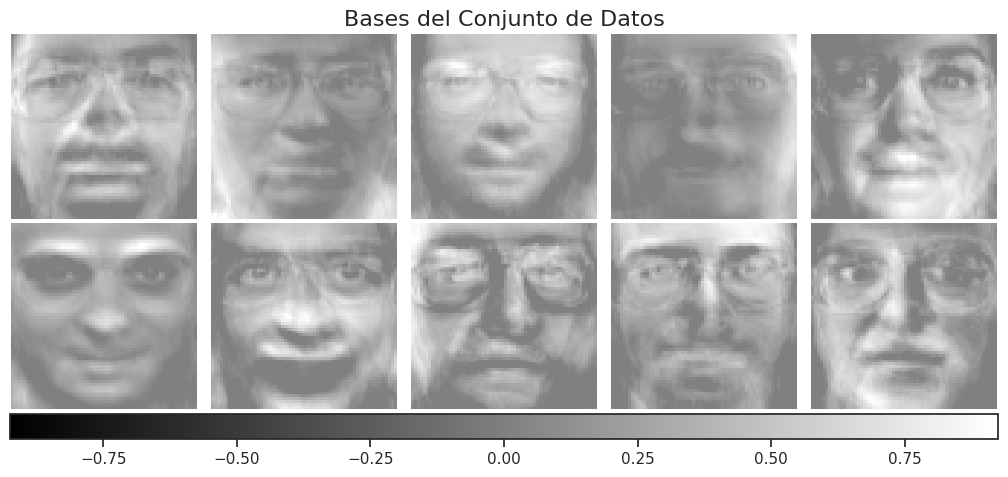

In [44]:
# Obtenemos las componentes (también conocidas como bases) del modelo NMF entrenado.
H = nmf.components_

# Llamamos a la función 'plot_faces' que explicamos previamente para mostrar las bases obtenidas por NMF en una figura.
# La figura tiene un diseño organizado en 2 filas y 5 columnas.
# Cada subplot muestra una de las bases obtenidas por NMF, lo que nos permite visualizar las características aprendidas por el modelo.
plot_faces("Bases del Conjunto de Datos", H, 5, 2)

$ \ $

$(6)$ For all rows in the pairwise distance matrix, output their smallest distances as ***similar_distance***, and the index associated with the smallest distances as ***similar_index***.

In [45]:
# similar_index: Calculamos los índices de las muestras más similares en el conjunto de entrenamiento (X_r) para cada muestra en el conjunto de consulta (X_q).
# Para cada muestra en X_q, encontramos el índice de la muestra más similar en X_r, es decir, el índice de la muestra en X_r que tiene la distancia más cercana a la muestra en X_q.
# Para ello, utilizamos la función np.argmin() con el argumento axis=1 para calcular el índice mínimo a lo largo del eje 1 (filas) de la matriz de distancias D.
similar_index = np.argmin(D, axis = 1)

# similar_distance: Calculamos las distancias de las muestras más similares en el conjunto de entrenamiento (X_r) para cada muestra en el conjunto de consulta (X_q).
# Para cada muestra en X_q, encontramos la distancia mínima a las muestras en X_r, es decir, la distancia a la muestra en X_r que tiene la menor distancia a la muestra en X_q.
# Para ello, utilizamos la función np.min() con el argumento axis=1 para calcular el valor mínimo a lo largo del eje 1 (filas) de la matriz de distancias D.
similar_distance = np.min(D, axis = 1)


$ \ $

$(7)$ We reconstruct the first $10$ faces using inverse_transform.

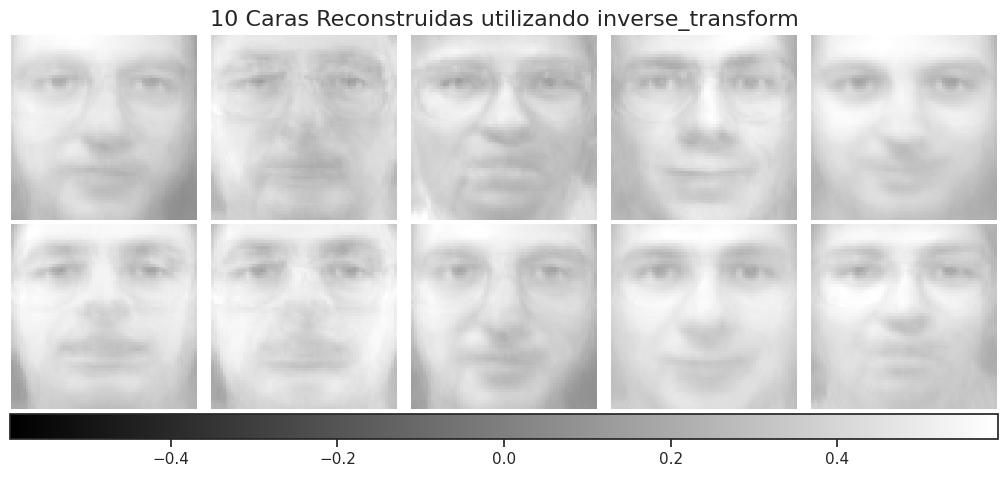

In [46]:
# W: Calculamos la matriz de coeficientes latentes W para el conjunto de entrenamiento (X) utilizando la función transform del modelo NMF previamente ajustado.
W = nmf.transform(X.reshape((400, 64*64)))

# w: Seleccionamos los primeros 10 vectores de coeficientes latentes de la matriz W.
w = W[:10, :]

# X_hat: Reconstruimos las imágenes originales a partir de los coeficientes latentes w6 utilizando la función inverse_transform del modelo NMF.
X_hat = nmf.inverse_transform(w)

# Mostramos las imágenes reconstruidas en una figura utilizando la función plot_faces que explicamos previamente.
# La figura tiene un diseño organizado en 2 filas y 5 columnas.
plot_faces("10 Caras Reconstruidas utilizando inverse_transform", X_hat, 5, 2)

$ \ $

$(8)$ Use the ***similar_distance*** as input for the ***threshold*** function. You can specify the min and max threshold for the distances. Return the index of the original dataset and the query dataset that satisfy the specified threshold. Use ***plot_data_query*** to plot the first $5$ pairs of face images that our image retrieval system "views" as similar.

In [47]:
# o_index, q_index: Calculamos los índices de las muestras del conjunto de datos original (o_index) y del conjunto de consulta (q_index) que cumplen con la condición definida por la función threshold.
o_index, q_index = threshold(similar_distance)


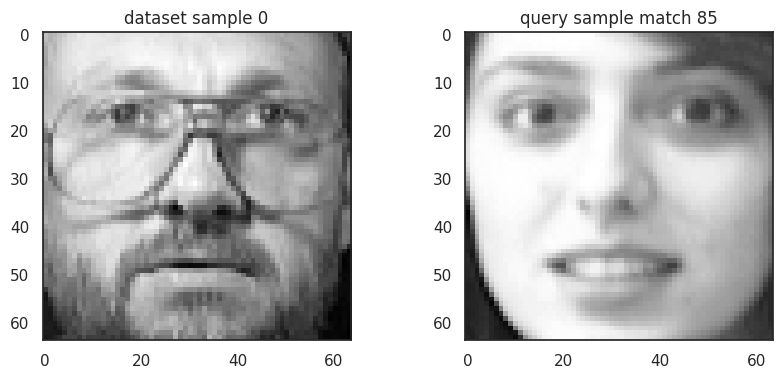

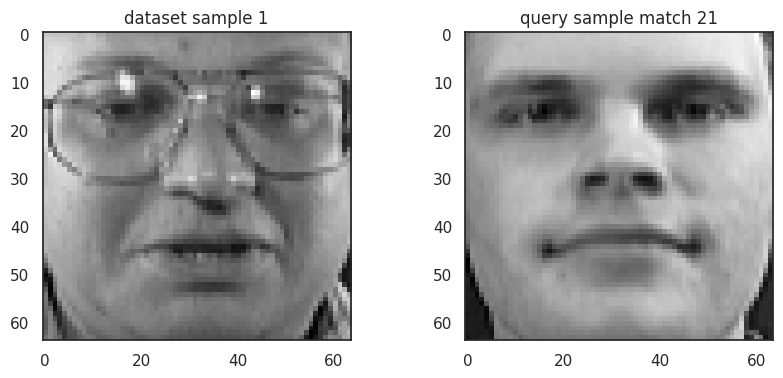

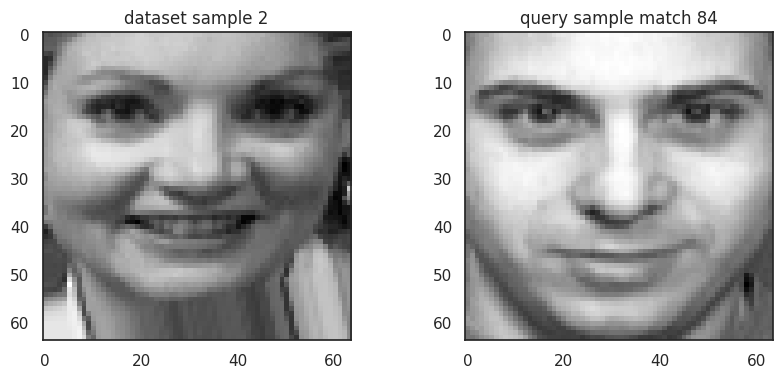

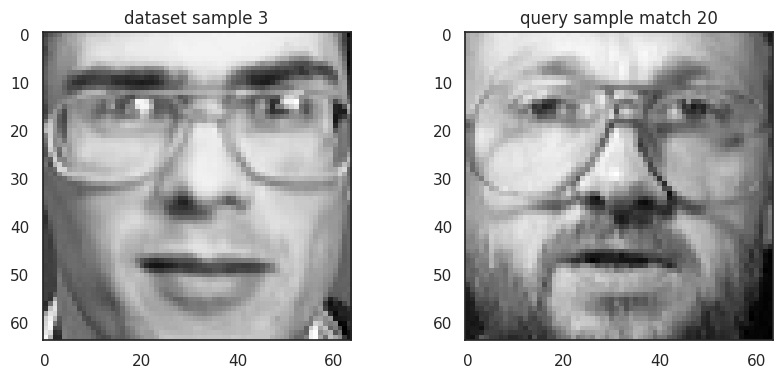

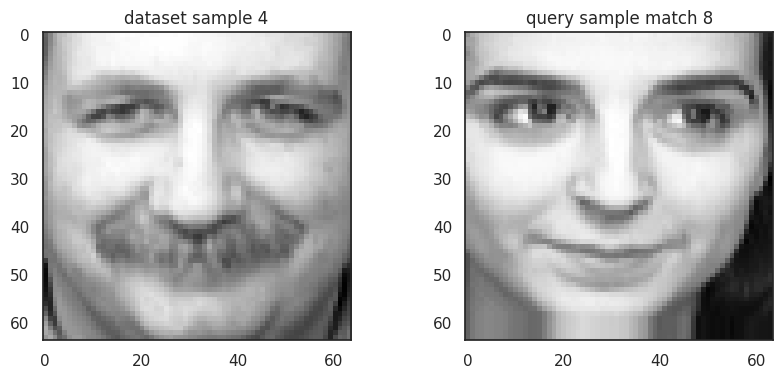

In [48]:
# Length y Width: Establecemos las dimensiones del largo y ancho de las imágenes a 64x64 píxeles.
Length = 64
Width = 64

# plot_data_query: Mostramos las primeras 5 muestras tanto del conjunto de datos original (usando los índices o_index) como del conjunto de consulta (usando los índices q_index).
# La función plot_data_query fue explicada previamente y muestra una figura con dos subplots para cada muestra, uno para la muestra del conjunto de datos original y otro para la muestra del conjunto de consulta.
plot_data_query(o_index, q_index, 5)


$ \ $

$(9)$ We show the first $6$ images reconstructed using the 'inverse_transform' function of the NMF model.

In [49]:
# X_hat_M: Calculamos la reconstrucción de las imágenes utilizando la multiplicación matricial de los primeros 6 coeficientes latentes 'w6' con la matriz 'H' (obtenida del modelo NMF).
X_hat_M = w @ H

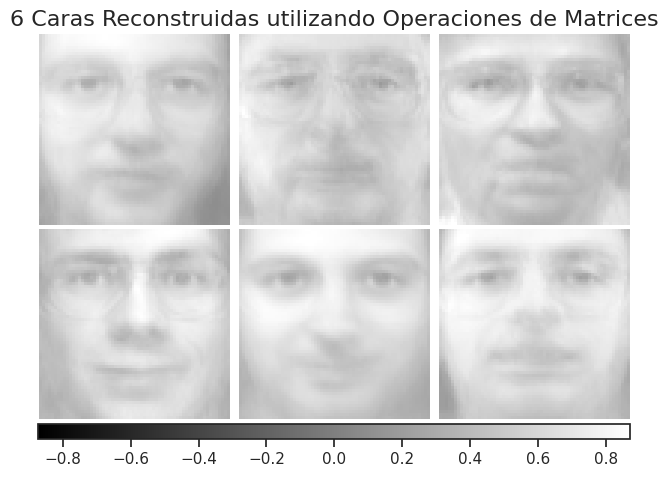

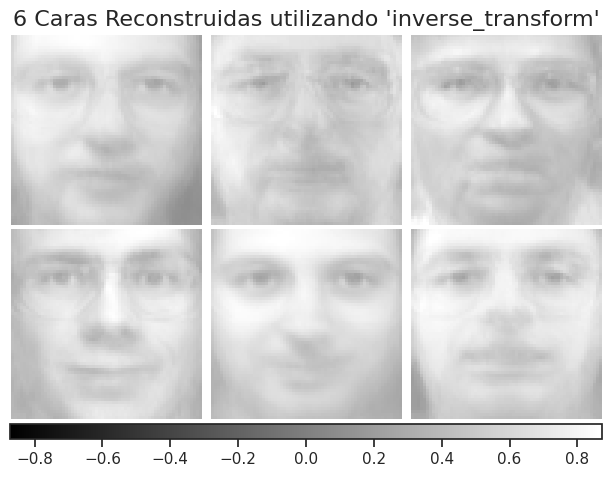

In [50]:

# plot_faces: Mostramos las primeras 6 imágenes reconstruidas utilizando la multiplicación matricial.
# La función plot_faces fue explicada previamente y muestra una figura con dos subplots para cada muestra, uno para la imagen original y otro para la imagen reconstruida.
plot_faces("6 Caras Reconstruidas utilizando Operaciones de Matrices", X_hat_M, 3, 2)


# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Describimos un espacio entre los plots
print("\n\n\n")

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# plot_faces: Mostramos las primeras 6 imágenes reconstruidas utilizando la función 'inverse_transform' del modelo NMF.
# La función plot_faces fue explicada previamente y muestra una figura con dos subplots para cada muestra, uno para la imagen original y otro para la imagen reconstruida.
plot_faces("6 Caras Reconstruidas utilizando 'inverse_transform'", X_hat, 3, 2)
